## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv("/Users/rileysallander/Desktop/ML/ML554/Data/ha_1.csv")

# Select predictors and target
X = data[["age", "chol"]]
y = data["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Coefficients
intercept = logreg.intercept_[0]
age_coef, chol_coef = logreg.coef_[0]

# Function to calculate cholesterol level for a given probability
def calculate_cholesterol(age, prob, intercept, age_coef, chol_coef):
    log_odds = np.log(prob / (1 - prob))
    chol = (log_odds - intercept - age_coef * age) / chol_coef
    return chol

# For a 55-year-old:
age = 55

# Cholesterol level for predicting heart disease (probability = 0.5)
chol_50 = calculate_cholesterol(age, prob=0.5, intercept=intercept, age_coef=age_coef, chol_coef=chol_coef)

# Cholesterol level for a 90% chance of heart disease (probability = 0.9)
chol_90 = calculate_cholesterol(age, prob=0.9, intercept=intercept, age_coef=age_coef, chol_coef=chol_coef)

print(f"For a 55-year-old:")
print(f"Cholesterol level for predicting heart disease: {chol_50:.2f}")
print(f"Cholesterol level for a 90% chance of heart disease: {chol_90:.2f}")


For a 55-year-old:
Cholesterol level for predicting heart disease: 325.78
Cholesterol level for a 90% chance of heart disease: 1205.50
For a 55-year-old:
Cholesterol level for predicting heart disease: 325.78
Cholesterol level for a 90% chance of heart disease: 1205.50


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load data
data = pd.read_csv("/Users/rileysallander/Desktop/ML/ML554/Data/ha_1.csv")

# Select predictors and target
X = data[["age", "chol"]]
y = data["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Coefficients
coef = lda.coef_[0]
intercept = lda.intercept_[0]

# Function to calculate cholesterol level at the decision boundary
def calculate_cholesterol_lda(age, intercept, coef):
    chol_coef = coef[1]
    age_coef = coef[0]
    chol = -(intercept + age_coef * age) / chol_coef
    return chol

# For a 55-year-old:
age = 55
chol_threshold = calculate_cholesterol_lda(age, intercept, coef)

print(f"For a 55-year-old, the cholesterol level threshold for predicting heart disease is: {chol_threshold:.2f}")




For a 55-year-old, the cholesterol level threshold for predicting heart disease is: 328.38
For a 55-year-old, the cholesterol level threshold for predicting heart disease is: 328.38


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Load data
data = pd.read_csv("/Users/rileysallander/Desktop/ML/ML554/Data/ha_1.csv")

# Select predictors and target
X = data[["age", "chol"]]
y = data["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tune regularization parameter using GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
svc = SVC(kernel='linear', probability=True, random_state=42)
grid_search = GridSearchCV(svc, param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_svc = grid_search.best_estimator_

# Coefficients from the linear SVC
coef = best_svc.coef_[0]  # [age_coef, chol_coef]
intercept = best_svc.intercept_[0]

# Function to calculate cholesterol level at the decision boundary
def calculate_cholesterol_svc(age, intercept, coef):
    age_coef = coef[0]
    chol_coef = coef[1]
    chol = -(intercept + age_coef * age) / chol_coef
    return chol

# For a 55-year-old
age = 55
chol_threshold = calculate_cholesterol_svc(age, intercept, coef)

print(f"For a 55-year-old, the cholesterol level threshold for predicting heart disease is: {chol_threshold:.2f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


For a 55-year-old, the cholesterol level threshold for predicting heart disease is: 290.47
For a 55-year-old, the cholesterol level threshold for predicting heart disease is: 290.47


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

<positron-console-cell-30>:34: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


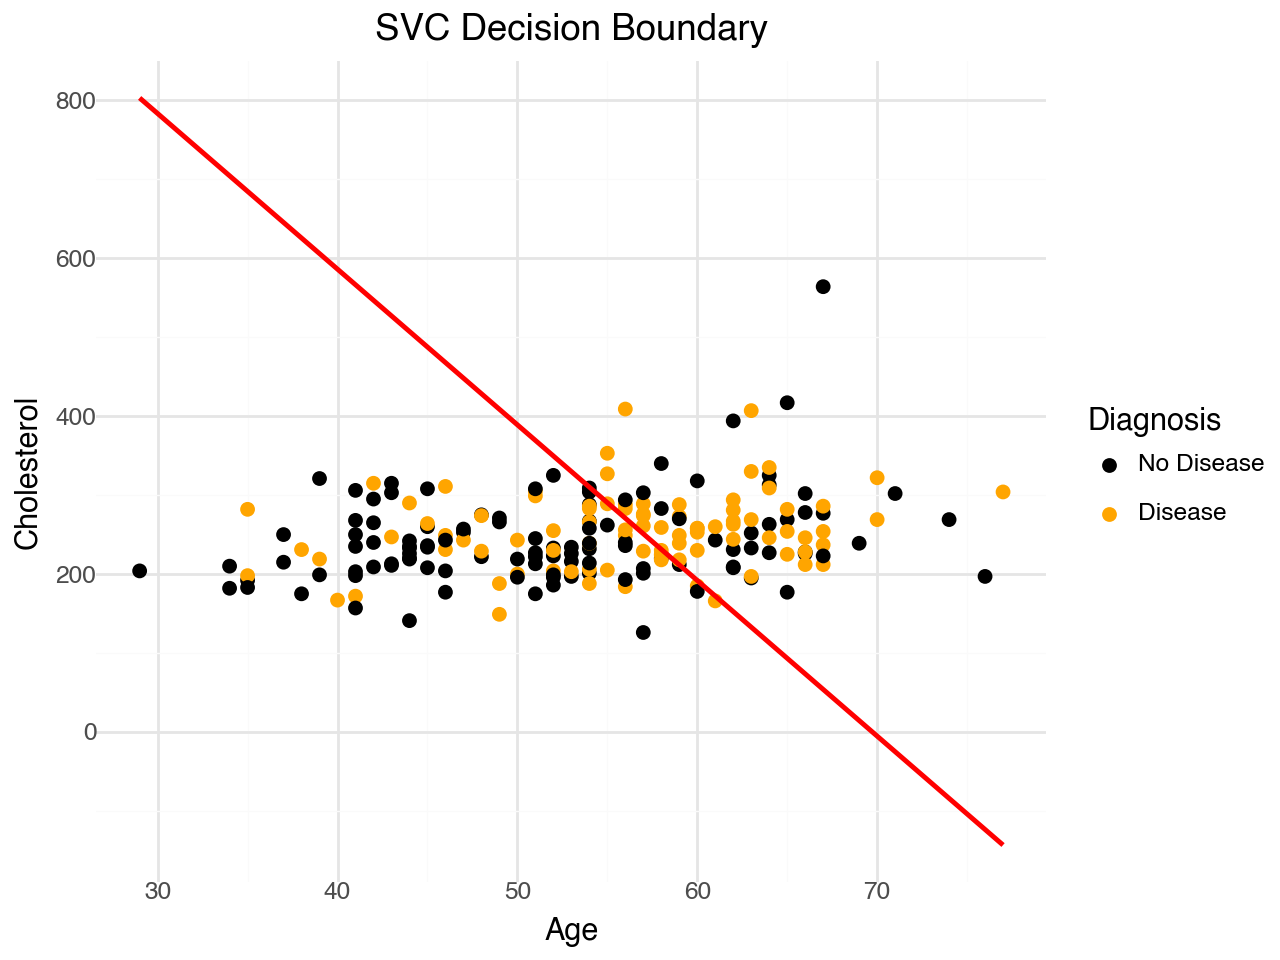

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


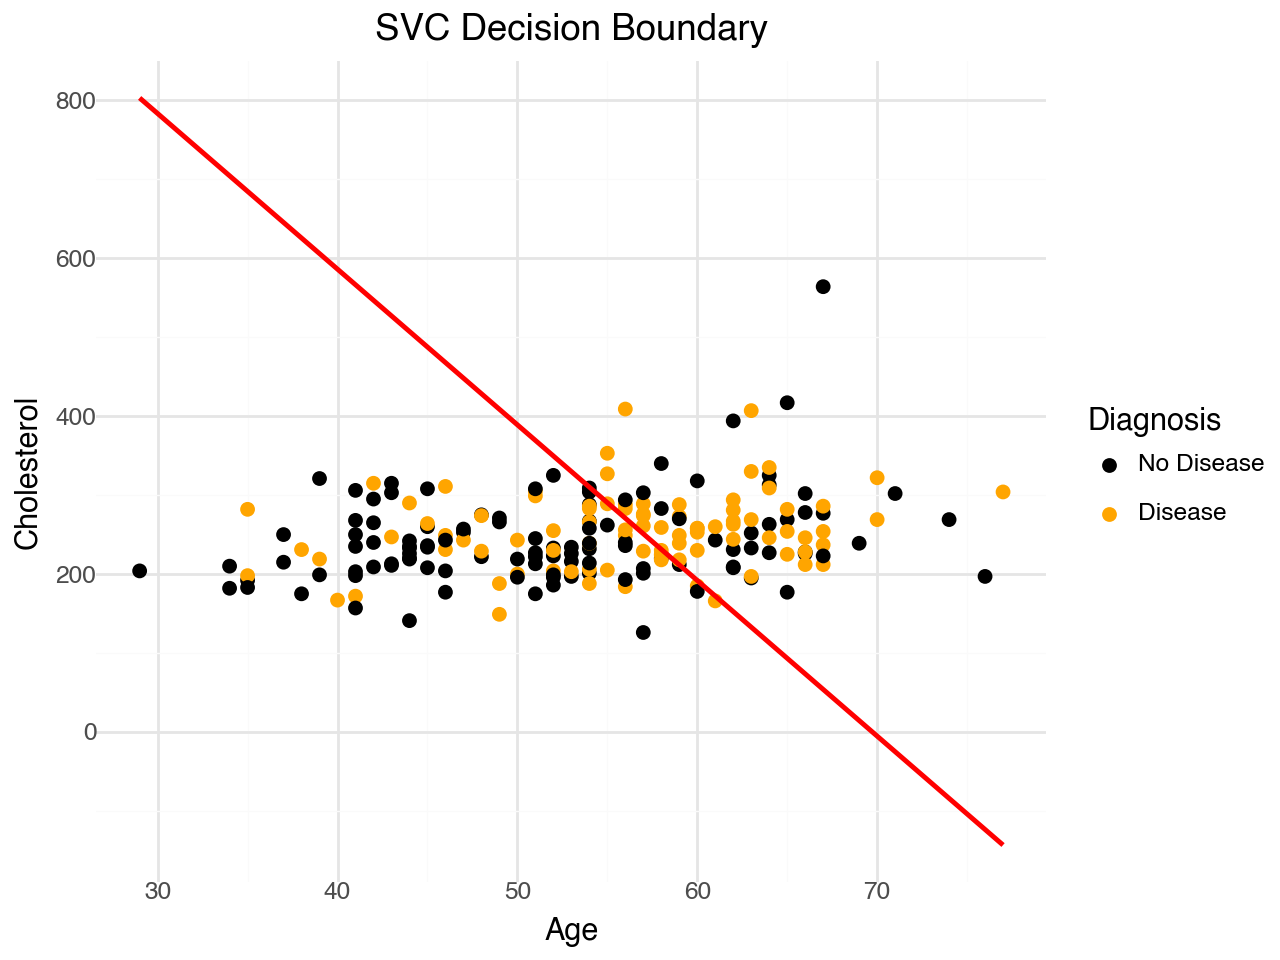

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_abline, labs, theme_minimal, scale_color_manual

# Define decision boundary function for SVC
def svc_boundary(x, intercept, coef):
    age_coef, chol_coef = coef
    return -(intercept + age_coef * x) / chol_coef

# Generate age values for the decision boundary
age_vals = np.linspace(X["age"].min(), X["age"].max(), 100)
svc_line = [svc_boundary(age, best_svc.intercept_[0], best_svc.coef_[0]) for age in age_vals]

# Create DataFrame for plotting
boundary_df = pd.DataFrame({
    "age": age_vals,
    "chol": svc_line
})

# Data for scatterplot
data_plot = pd.DataFrame({"age": X["age"], "chol": X["chol"], "diagnosis": y})

# Create plot
plot = (
    ggplot(data_plot, aes(x="age", y="chol", color="factor(diagnosis)")) +
    geom_point(size=2) +
    geom_line(boundary_df, aes(x="age", y="chol"), color="red", linetype="solid", size=1) +
    labs(title="SVC Decision Boundary",
         x="Age", y="Cholesterol", color="Diagnosis") +
    scale_color_manual(values=["black", "orange"], labels=["No Disease", "Disease"]) +
    theme_minimal()
)

print(plot)
